In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
strands = [8, 64, 512, 4096, 32768]
mps = [2, 5, 10, 20, 40]

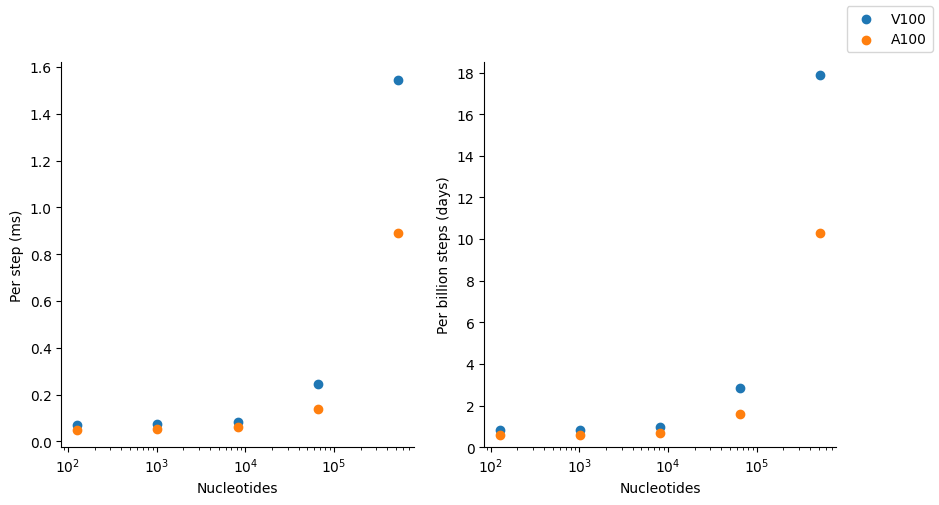

In [12]:
# Plot non-MPS runs
perstep_a100 = []
perstep_v100 = []
for n in strands:
    path = f"N{n}/"
    errfile = [f for f in os.listdir(path) if '.err' in f][0]
    with open(os.path.join(path, errfile)) as f:
        lines = f.readlines()
        perstep = [l for l in lines if 'per step' in l][0]
    perstep_a100.append(float(perstep.split(' ')[-2]))

    path = f"cobra/N{n}/"
    errfile = [f for f in os.listdir(path) if '.err' in f][0]
    with open(os.path.join(path, errfile)) as f:
        lines = f.readlines()
        perstep = [l for l in lines if 'per step' in l][0]
    perstep_v100.append(float(perstep.split(' ')[-2]))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_xscale('log')
ax[0].scatter(np.array(strands)*16, perstep_v100, label='V100')
ax[0].scatter(np.array(strands)*16, perstep_a100, label='A100')

ax[0].set_xlabel('Nucleotides')
ax[0].set_ylabel('Per step (ms)')

ax[1].set_xscale('log')
ax[1].scatter(np.array(strands)*16, np.array(perstep_v100)*1000000000/1000/60/60/24)
ax[1].scatter(np.array(strands)*16, np.array(perstep_a100)*1000000000/1000/60/60/24)

ax[1].set_xlabel('Nucleotides')
ax[1].set_ylabel('Per billion steps (days)')
ax[1].set_yticks(np.arange(0, 20, 2))
ax[1].set_ylim(0, 18.5)
fig.legend()

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


In [13]:
# plot MPS data
mps_a100 = []
mps_v100 = []

for i, n in enumerate(strands):
    mps_a100.append([])
    mps_v100.append([])
    for j, m in enumerate(mps):
        mps_a100[i].append([])
        mps_v100[i].append([])
        for r in range(m):
            path = f"N{n}M{m}/r{r+1}/"
            try:
                log = [f for f in os.listdir(path) if 'log_' in f][0]
                with open(os.path.join(path, log)) as f:
                    lines = f.readlines()
                perstep = [l for l in lines if 'per step' in l][0]
            except:
                print(f"run N{n}M{m}/r{r+1}/ failed")
                continue
            
            mps_a100[i][j].append(float(perstep.split(' ')[-2]))

            path = f"cobra/N{n}M{m}/r{r+1}/"
            try:
                log = [f for f in os.listdir(path) if 'log' in f][0]
                with open(os.path.join(path, log)) as f:
                    lines = f.readlines()
                perstep = [l for l in lines if 'per step' in l][0]
            except:
                print(path, "failed")
                continue

            mps_v100[i][j].append(float(perstep.split(' ')[-2]))
        

run N64M2/r1/ failed
cobra/N64M5/r5/ failed
cobra/N64M10/r7/ failed
cobra/N64M10/r8/ failed
run N64M10/r10/ failed
run N64M20/r8/ failed
run N64M20/r13/ failed
cobra/N64M40/r1/ failed
cobra/N64M40/r5/ failed
run N64M40/r7/ failed
run N64M40/r9/ failed
cobra/N64M40/r10/ failed
run N64M40/r12/ failed
run N64M40/r13/ failed
run N64M40/r15/ failed
cobra/N64M40/r24/ failed
run N64M40/r31/ failed
run N64M40/r35/ failed
cobra/N32768M10/r3/ failed
cobra/N32768M20/r1/ failed
cobra/N32768M20/r2/ failed
cobra/N32768M20/r3/ failed
cobra/N32768M20/r4/ failed
cobra/N32768M20/r5/ failed
cobra/N32768M20/r6/ failed
cobra/N32768M20/r7/ failed
cobra/N32768M20/r8/ failed
cobra/N32768M20/r9/ failed
cobra/N32768M20/r10/ failed
run N32768M20/r11/ failed
run N32768M20/r12/ failed
run N32768M20/r13/ failed
run N32768M20/r14/ failed
run N32768M20/r15/ failed
run N32768M20/r16/ failed
run N32768M20/r17/ failed
run N32768M20/r18/ failed
run N32768M20/r19/ failed
run N32768M20/r20/ failed
cobra/N32768M40/r1/ faile

/u/epoppleton/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/u/epoppleton/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


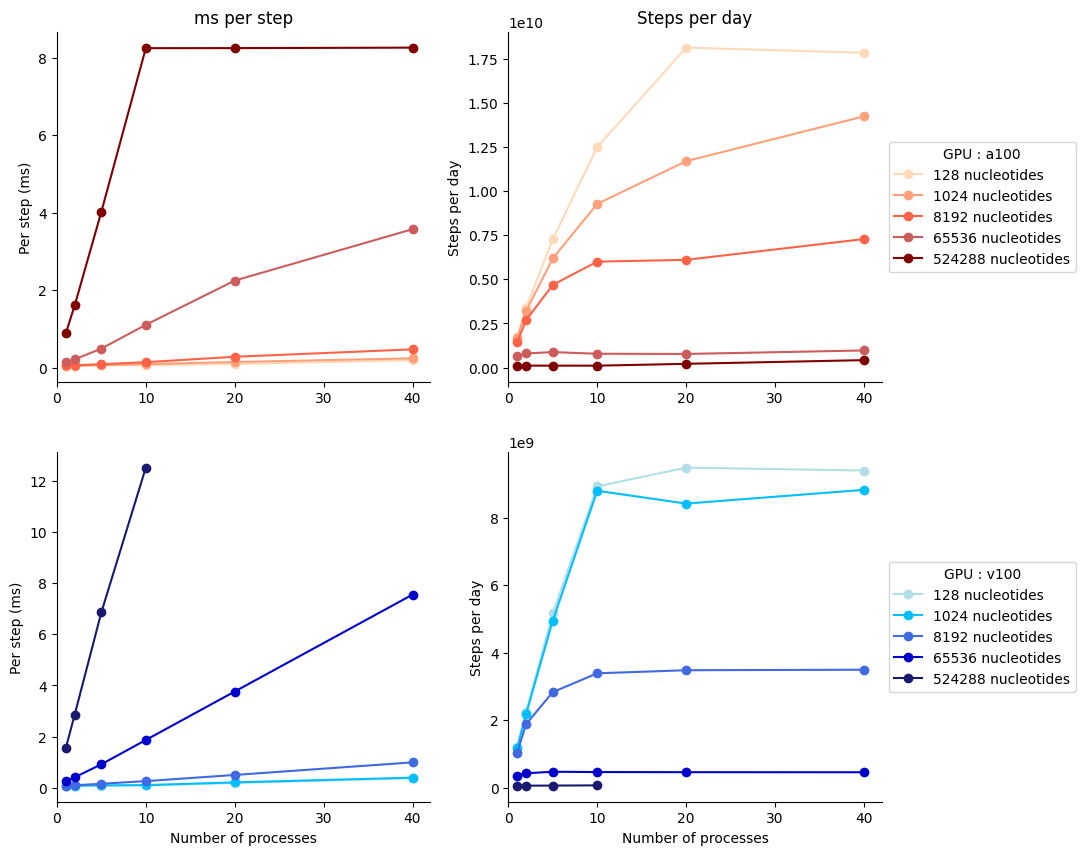

In [14]:
a100_cols = ['peachpuff', 'lightsalmon', 'tomato', 'indianred', 'maroon']
v100_cols = ['powderblue', 'deepskyblue', 'royalblue', 'mediumblue', 'midnightblue']
x = [1]+mps
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
for i, n in enumerate(strands):
    # Plot data
    means = [np.mean(d) for d in mps_a100[i]]
    means = [perstep_a100[i]]+means
    ax[0][0].plot(x, means, label=str(n*16)+" nucleotides", c=a100_cols[i], marker='o')
    ax[0][1].plot(x, 1/np.array(means)*1000*60*60*24*np.array(x), label=str(n*16)+" nucleotides", c=a100_cols[i], marker='o')

    # Move axes over to make room for legend
    box1 = ax[0][0].get_position()
    ax[0][0].set_position([box1.x0, box1.y0, box1.width*0.96, box1.height])
    box1 = ax[0][0].get_position()
    box2 = ax[0][1].get_position()
    ax[0][1].set_position([box1.x0+box1.width+0.06, box2.y0, box2.width*0.96, box2.height])
    ax[0][1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='GPU : a100')

    # plot data
    means = [np.mean(d) for d in mps_v100[i]]
    means = [perstep_v100[i]]+means
    ax[1][0].plot(x, means, label=str(n*16)+" nucleotides", c=v100_cols[i], marker='o')
    ax[1][1].plot(x, 1/np.array(means)*1000*60*60*24*np.array(x), label=str(n*16)+" nucleotides", c=v100_cols[i], marker='o')

    # Move axes over to make room for legend
    box1 = ax[1][0].get_position()
    ax[1][0].set_position([box1.x0, box1.y0, box1.width*0.96, box1.height])
    box1 = ax[1][0].get_position()
    box2 = ax[1][1].get_position()
    ax[1][1].set_position([box1.x0+box1.width+0.06, box2.y0, box2.width*0.96, box2.height])
    ax[1][1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='GPU : v100')

# Pretty plots
for a1 in ax:
    for a in a1:
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.set_xlim(0, 42)

# Labels
ax[0][0].set_title('ms per step')
ax[0][0].set_ylabel('Per step (ms)')
ax[1][0].set_ylabel('Per step (ms)')
ax[0][1].set_title('Steps per day')
ax[0][1].set_ylabel('Steps per day')
ax[1][1].set_ylabel('Steps per day')
ax[1][0].set_xlabel('Number of processes')
ax[1][1].set_xlabel('Number of processes')
ax[1][1].set_xlabel('Number of processes')

plt.savefig('oxDNA_speedtest.png', dpi=300)

In [ ]:
# number of cpus was capped at 16 and 20, for the a100 and v100 respectivley

In [ ]:
# Create table
# n_nuc | n_proc | per step | step per day | success
def print_table(data, fname):
    outstr = []
    header = "n_nuc,n_proc,per step,step per day,success"
    print(header)
    outstr.append(header)
    for i, n in enumerate(strands):
        n_nuc = n*16
        for j, m in enumerate(x): # x is my array from the plots which also includes the non-mps run
            per_step = np.mean(data[i][j])
            steps_per_day = 1/np.array(per_step)*1000*60*60*24*m
            success = f"{len(data[i][j])}/{m}"
            line = f"{n_nuc},{m},{per_step:.3f},{steps_per_day:.3e},{success}"
            print(line)
            outstr.append(line)

    with open(fname, "w+") as f:
        f.write('\n'.join(outstr))

In [ ]:
# a100 data
data = [[[c1]]+m for c1, m in zip(perstep_a100, mps_a100)]
print_table(data, "a100.csv")

n_nuc,n_proc,per step,step per day,success
128,1,0.051,1.704e+09,1/1
128,2,0.051,3.376e+09,2/2
128,5,0.059,7.272e+09,5/5
128,10,0.069,1.249e+10,10/10
128,20,0.095,1.812e+10,20/20
128,40,0.194,1.783e+10,40/40
1024,1,0.051,1.690e+09,1/1
1024,2,0.054,3.194e+09,1/2
1024,5,0.070,6.181e+09,5/5
1024,10,0.093,9.267e+09,9/10
1024,20,0.148,1.169e+10,18/20
1024,40,0.243,1.423e+10,33/40
8192,1,0.060,1.450e+09,1/1
8192,2,0.064,2.680e+09,2/2
8192,5,0.092,4.682e+09,5/5
8192,10,0.144,5.998e+09,10/10
8192,20,0.283,6.099e+09,20/20
8192,40,0.475,7.277e+09,40/40
65536,1,0.138,6.251e+08,1/1
65536,2,0.217,7.977e+08,2/2
65536,5,0.494,8.742e+08,5/5
65536,10,1.108,7.801e+08,10/10
65536,20,2.248,7.686e+08,20/20
65536,40,3.574,9.671e+08,40/40
524288,1,0.890,9.711e+07,1/1
524288,2,1.606,1.076e+08,2/2
524288,5,4.022,1.074e+08,5/5
524288,10,8.242,1.048e+08,10/10
524288,20,nan,nan,0/20
524288,40,8.255,4.186e+08,10/40


In [ ]:
# v100 data
data = [[[c1]]+m for c1, m in zip(perstep_v100, mps_v100)]
print_table(data, "v100.csv")

n_nuc,n_proc,per step,step per day,success
128,1,0.072,1.202e+09,1/1
128,2,0.077,2.250e+09,2/2
128,5,0.084,5.161e+09,5/5
128,10,0.097,8.922e+09,10/10
128,20,0.182,9.480e+09,20/20
128,40,0.368,9.394e+09,40/40
1024,1,0.073,1.184e+09,1/1
1024,2,0.079,2.182e+09,1/2
1024,5,0.087,4.949e+09,4/5
1024,10,0.098,8.795e+09,7/10
1024,20,0.205,8.414e+09,18/20
1024,40,0.392,8.822e+09,29/40
8192,1,0.083,1.041e+09,1/1
8192,2,nan,nan,0/2
8192,5,0.153,2.831e+09,5/5
8192,10,0.255,3.388e+09,10/10
8192,20,0.497,3.479e+09,20/20
8192,40,0.989,3.494e+09,40/40
65536,1,0.244,3.542e+08,1/1
65536,2,0.404,4.275e+08,2/2
65536,5,0.914,4.727e+08,5/5
65536,10,1.865,4.634e+08,10/10
65536,20,3.761,4.594e+08,20/20
65536,40,7.553,4.576e+08,40/40
524288,1,1.546,5.588e+07,1/1
524288,2,nan,nan,0/2
524288,5,6.859,6.298e+07,5/5
524288,10,nan,nan,0/10
524288,20,nan,nan,0/20
524288,40,nan,nan,0/40
